In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import numpy as np
from skimage.measure import profile_line
from scipy import sparse
from pymatreader import read_mat
import pandas as pd
import cProfile
from util.sys import get_path
from extract_graph import (
    generate_graph_tab_from_skeleton,
    generate_nx_graph_from_skeleton,
)
import networkx as nx
from random import randrange
import math
import cv2

plate = 13
date1 = "0703_1157"
date2 = "0703_1557"
date3 = "0703_1957"
row = 6
column = 10

In [3]:
imtab1 = np.load(f"Data/imbackrem_{date1}_{plate}_{row}_{column}.npy")
imtab2 = np.load(f"Data/imbackrem_{date2}_{plate}_{row}_{column}.npy")
imtab3 = np.load(f"Data/imbackrem_{date3}_{plate}_{row}_{column}.npy")
skeleton1 = np.load(f"Data/skeletonizedpruned_{date1}_{plate}_{row}_{column}.npy")
skeleton2 = np.load(f"Data/skeletonizedpruned_{date2}_{plate}_{row}_{column}.npy")
skeleton3 = np.load(f"Data/skeletonizedpruned_{date3}_{plate}_{row}_{column}.npy")

In [4]:
graph_tab1 = generate_graph_tab_from_skeleton(skeleton1)
graph_tab2 = generate_graph_tab_from_skeleton(skeleton2)
graph_tab3 = generate_graph_tab_from_skeleton(skeleton3)

In [5]:
nx_graph1, pos1 = generate_nx_graph_from_skeleton(skeleton1)
nx_graph2, pos2 = generate_nx_graph_from_skeleton(skeleton2)

In [ ]:
for node in nx_graph1.nodes:
    if nx_graph.degree[node] == 1:
        for edge in nx_graph1.edges(node):
            data = nx_graph1.get_edge_data(*edge)
            if data["weight"] < 9:
                is_artefact = True
                for edge_2nd in nx_graph1.edges(edge[0]):
                    data = nx_graph1.get_edge_data(*edge_2nd)

In [28]:
for edge in nx_graph1.edges:
    data=nx_graph1.get_edge_data(*edge)
    if data['weight']<9:
        is_artefact=True
        for edge in nx_graph1.edges(edge[0]):
    break

IndentationError: expected an indented block (<ipython-input-28-68ed0ae450ca>, line 6)

In [31]:
[
    (pos1[info[0]], pos1[info[1]], info[2])
    for info in nx_graph1.edges.data("weight")
    if info[2] < 20
]

[(array([2296, 1473], dtype=int32), array([2296, 1464], dtype=int32), 10),
 (array([1721,  652], dtype=int32), array([1729,  646], dtype=int32), 9),
 (array([1721,  652], dtype=int32), array([1723,  660], dtype=int32), 9),
 (array([1729,  646], dtype=int32), array([1723,  660], dtype=int32), 18),
 (array([1729,  646], dtype=int32), array([1728,  644], dtype=int32), 3),
 (array([2073, 1112], dtype=int32), array([2067, 1097], dtype=int32), 16),
 (array([2067, 1097], dtype=int32), array([2074, 1095], dtype=int32), 9),
 (array([2106, 1163], dtype=int32), array([2115, 1159], dtype=int32), 10),
 (array([2115, 1159], dtype=int32), array([2112, 1152], dtype=int32), 8),
 (array([2296, 1464], dtype=int32), array([2293, 1463], dtype=int32), 4),
 (array([2676, 2660], dtype=int32), array([2666, 2653], dtype=int32), 11),
 (array([2625, 2765], dtype=int32), array([2625, 2760], dtype=int32), 6),
 (array([2989, 2374], dtype=int32), array([2999, 2385], dtype=int32), 12),
 (array([2857, 1710], dtype=int3

(array([2., 3., 5., 2., 0., 2., 2., 1., 2., 2.]),
 array([ 3. ,  5.6,  8.2, 10.8, 13.4, 16. , 18.6, 21.2, 23.8, 26.4, 29. ]),
 <BarContainer object of 10 artists>)

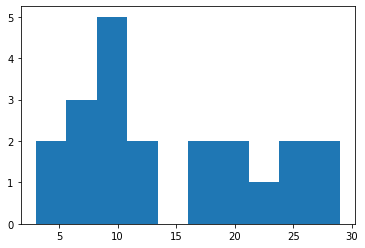

In [20]:
plt.hist([info[2] for info in nx_graph1.edges.data("weight") if info[2] < 30], 10)

In [ ]:
for node in nx_graph1.nodes:
    if nx_graph.degree[node] == 3:
        for edge in nx_graph1.edges(node):
            data = nx_graph1.get_edge_data(*edge)
            if data["weight"] < 9:
                is_artefact = True
                for edge_2nd in nx_graph1.edges(edge[0]):
                    data = nx_graph1.get_edge_data(*edge_2nd)

In [8]:
for node in nx_graph1.nodes:
    if nx_graph.degree[node] == 2:
        neighbours = [neigh for neigh in nx_graph.neighbours(node)]

DegreeView({0: 1, 22: 3, 1: 1, 11: 3, 2: 1, 7: 3, 3: 1, 5: 1, 4: 1, 10: 3, 6: 2, 8: 1, 9: 1, 14: 3, 23: 3, 12: 1, 13: 2, 15: 1, 16: 2, 17: 3, 20: 3, 18: 1, 19: 1, 26: 3, 21: 2, 24: 3, 30: 3, 40: 3, 25: 1, 28: 1, 27: 1, 29: 1, 33: 3, 31: 3, 42: 3, 32: 1, 36: 3, 38: 3, 35: 2, 34: 1, 39: 1, 37: 1, 52: 3, 54: 1, 41: 1, 44: 2, 55: 1, 43: 1, 51: 3, 46: 1, 45: 2, 47: 1, 50: 3, 48: 1, 49: 1, 57: 1, 53: 1, 58: 1, 56: 1})

In [13]:
for n in nx_graph1.neighbors(13):
    print(n)

12
14


In [46]:
def node_dist(node1, node2, nx_graph_tm1, nx_graph_t, pos_tm1, pos_t):
    sparse_cross1 = sparse.dok_matrix((3000, 4096), dtype=bool)
    sparse_cross2 = sparse.dok_matrix((3000, 4096), dtype=bool)
    for edge in nx_graph_tm1.edges(node1):
        list_pixel = nx_graph_tm1.get_edge_data(*edge)["pixel_list"]
        if (pos_tm1[node1] != list_pixel[0]).any():
            list_pixel = list(reversed(list_pixel))
        print(list_pixel[0] == pos_tm1[node1])
        print(list_pixel[0], pos_tm1[node1])
        for pixel in list_pixel[:20]:
            sparse_cross1[pixel] = 1
    for edge in nx_graph_t.edges(node2):
        list_pixel = nx_graph_t.get_edge_data(*edge)["pixel_list"]
        if (pos_t[node2] != list_pixel[0]).any():
            list_pixel = list(reversed(list_pixel))
        print(list_pixel[0] == pos_t[node2])
        for pixel in list_pixel[:20]:
            sparse_cross2[pixel] = 1
    kernel = np.ones((3, 3), np.uint8)
    dilation1 = cv2.dilate(
        sparse_cross1.todense().astype(np.uint8), kernel, iterations=3
    )
    dilation2 = cv2.dilate(
        sparse_cross2.todense().astype(np.uint8), kernel, iterations=3
    )
    plt.imshow(dilation1[2250:2350, 1400:1500])
    plt.imshow(dilation2[2250:2350, 1400:1500], alpha=0.5)
    plt.show()
    return np.linalg.norm(dilation1 - dilation2)

In [17]:
pos1[26]

array([2296, 1473], dtype=int32)

In [18]:
pos2[34]

array([2296, 1466], dtype=int32)

[ True  True]
(2296, 1464) [2296 1464]
[ True  True]
(2296, 1464) [2296 1464]
[ True  True]
(2296, 1464) [2296 1464]
[ True  True]
[ True  True]
[ True  True]


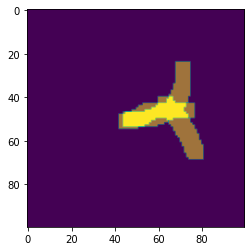

4777.432678751214

In [51]:
node_dist(25, 34, nx_graph1, nx_graph2, pos1, pos2)

In [7]:
corresp = {}
dist = {}
ambiguous = []
remaining_nodes = []
for node1 in nx_graph1.nodes:
    mini = np.inf
    if nx_graph1.degree[node1] >= 3:
        for node2 in nx_graph2.nodes:
            distance = math.dist(pos1[node1], pos2[node2])
            if distance < mini:
                mini = distance
                identifier = node2
        if mini < 10:
            if identifier in corresp.values():
                ambiguous.append(node1)
                print(node1, "node_dientified_two_times")
            corresp[node1] = identifier
        else:
            print(node1, mini, "node_none_iden")
            remaining_nodes.append(node1)
            dist[node1] = mini
for node in ambiguous:
    identifier = corresp[node]
    candidates = [nod for nod in corresp.keys() if corresp[nod] == identifier]
    for candidate in candidates:
        identified_neighbours = [
            corresp[neighbour] for neighbour in nx_graph1.neighbor(node)
        ]
    print(candidates)

6 11.180339887498947 node_none_iden
14 14.422205101855958 node_none_iden
19 39.96248240537617 node_none_iden
25 node_dientified_two_times
40 26.627053911388693 node_none_iden
57 20.8806130178211 node_none_iden


AttributeError: 'Graph' object has no attribute 'neighbor'

In [9]:
[node for node in corresp.keys() if corresp[node] == 34]

[26, 25]

In [8]:
corresp[25]

34

In [59]:
pos2[34]

array([2296, 1466], dtype=int32)

In [61]:
dist[25]

2.0

(array([3., 5., 3., 3., 5.]),
 array([2.23606798, 3.18885438, 4.14164079, 5.09442719, 6.0472136 ,
        7.        ]),
 <BarContainer object of 5 artists>)

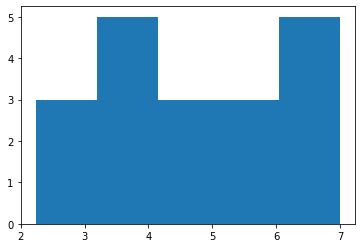

In [7]:
plt.hist(list(dist.values()), 5)

In [4]:
def dist_branch(pixel_list_tm1, pixel_list_t):
    squared_dist = 0
    length = min(len(pixel_list_t), len(pixel_list_tm1))
    for i in range(length):
        squared_dist += math.dist(pixel_list_t[i], pixel_list_tm1[i])
    return squared_dist / length

In [15]:
for indextm1, row in graph_tab1.iterrows():
    pixel_list_tm1 = row["pixel_list"]
    pixel_list_tm1_reversed = list(reversed(pixel_list_tm1))
    mini = np.inf
    index_id = 0
    reverse_tm1 = False
    reverse_t = False
    for index_tm1, row in graph_tab2.iterrows():
        pixel_list_t = row["pixel_list"]
        pixel_list_reversed_t = list(reversed(pixel_list_t))
        distance = dist_branch(pixel_list_tm1, pixel_list_t)
        distance_rev = dist_branch(pixel_list1, pixel_list2_reversed)
        if mini > distance:
            mini = distance
            index_id = indextm2
            reverse = False
        if mini > distance_rev:
            mini = distance_rev
            index_id = indextm2
            reverse = True
    break

In [16]:
mini

36.07122546223565

In [17]:
reverse

False

In [18]:
index_id

6

In [13]:
graph_tab1.loc[[0]]

,origin,end,pixel_list
0,"(1422, 1403)","(2296, 1473)","[(1422, 1403), (1423, 1403), (1424, 1404), (14..."


In [12]:
graph_tab2.loc[[6]]

,origin,end,pixel_list
6,"(1386, 1398)","(1504, 1393)","[(1386, 1398), (1387, 1399), (1388, 1399), (13..."


In [15]:
np.inf > 3.5

True

In [7]:
for index, row in graph_tab1.iterrows():
    pixel_list1 = row["pixel_list"]
    break

In [5]:
graph_tab1

,origin,end,pixel_list
0,"(1422, 1403)","(2296, 1473)","[(1422, 1403), (1423, 1403), (1424, 1404), (14..."
1,"(1506, 333)","(1819, 644)","[(1506, 333), (1507, 334), (1507, 335), (1507,..."
2,"(1589, 708)","(1727, 681)","[(1589, 708), (1590, 708), (1591, 707), (1592,..."
3,"(1698, 638)","(1721, 652)","[(1698, 638), (1699, 637), (1700, 637), (1701,..."
4,"(1704, 1362)","(1816, 1263)","[(1704, 1362), (1705, 1362), (1706, 1361), (17..."
...,...,...,...
56,"(2910, 438)","(2953, 404)","[(2910, 438), (2910, 437), (2909, 436), (2909,..."
57,"(2945, 1690)","(2997, 1658)","[(2945, 1690), (2945, 1689), (2946, 1689), (29..."
58,"(2953, 404)","(2995, 587)","[(2953, 404), (2954, 404), (2955, 405), (2956,..."
59,"(2989, 2374)","(2999, 2385)","[(2989, 2374), (2990, 2375), (2991, 2376), (29..."


In [6]:
for index, row in graph_tab2.iterrows():
    pixel_list2 = row["pixel_list"]
    break

In [12]:
dist_branch(pixel_list1, list(reversed(pixel_list1)))

438.62012238034816